In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
x = []
y = []
input_size = 120
chanel_num = 3
r=3
print("Program Started")
dir = "D:\\ML\\train\\"
for i in range(287):
    x_img = plt.imread(dir+'x'+str(i)+".jpg")
    y_img = plt.imread(dir+'y'+str(i)+".jpg")
    x.append(x_img.tolist())
    y.append(y_img.tolist())
    

    
x = np.array(x, dtype=np.float32)/255
y = np.array(y, dtype=np.float32)/255
def x_resize(x,r):
    x = (x*255).astype(np.uint8)
    img_list = [PIL.Image.fromarray(t) for t in x]
    img_list = [np.asarray(t.resize((input_size*r, input_size*r))) for t in img_list]
    img_list = np.asarray(img_list).astype(np.float32)
    return img_list/255

print("Data loaded")

def sub_extract(data, f_size, stride):
    result = []
    for d in data:
        output_w = 1+(d.shape[1]-f_size)/stride
        output_w = np.int(output_w)
        output_h = 1+(d.shape[0]-f_size)/stride
        output_h = np.int(output_h)
        for y in range(output_h):
            for x in range(output_w):
                sub_d = d[y*stride:y*stride+f_size, x*stride:x*stride+f_size, :]
                result.append(sub_d.tolist())
    result = np.asarray(result)
    return result
        


def save_img(hypothesis):
    n = 0
    for x in hypothesis:
        img = x*255
        img = img.astype(np.uint8)
        im = PIL.Image.fromarray(img.astype('uint8'), 'RGB')
        im.save("D:\\ML\\hypothesis\\hypothesis" + str(n) + ".jpg")
        n+=1

def show_img(hypothesis, index):
    img = hypothesis[index]
    plt.imshow(img)



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(None, None, chanel_num), kernel_size=3, filters=64, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same',activation='relu', kernel_initializer='he_normal'),
    
    tf.keras.layers.Conv2D(kernel_size=3, filters=3, padding='same', activation='relu')

])

def get_grad_loss_hypothesis(x,y):

    with tf.GradientTape() as tape:
        out = model(x)
        hypothesis = tf.add(x,out)
        
        reg = tf.Variable(0, dtype=tf.float32)
        for v in model.variables:
            length = len(model.variables)
            
            reg.assign_add(tf.reduce_mean(tf.square(v))/length)

        loss = tf.reduce_mean(tf.square(hypothesis-y)) + 0.0001*reg
    grads = tape.gradient(loss, model.variables)
    return (grads, loss.numpy(), hypothesis)

print("Start")

x = x_resize(x,r)
x = sub_extract(x, 60, 60)
y = sub_extract(y, 60, 60)
print(x.shape)
lr = 0.001
total_epoch = 100
batch_size = 41
batch_num = int(len(x)/batch_size)




Program Started
Data loaded
Start
(10332, 60, 60, 3)


In [ ]:
lr = 0.001
for epoch in range(total_epoch+1):
    loss_total = 0
    for batch in range(batch_num):
        X = x[batch*batch_size:(batch+1)*batch_size]
        Y = y[batch*batch_size:(batch+1)*batch_size]
        grads, loss, _ = get_grad_loss_hypothesis(X,Y)
        loss_total+=loss/batch_num
        optimizer = tf.optimizers.Adam(learning_rate=lr)
    if epoch<3: lr=lr*0.1
    if epoch%1==0: print(epoch, loss, "learning rate:", lr)
   

    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    


0 0.16195594 learning rate: 0.0001
1 0.004720583 learning rate: 1e-05
2 0.0035164715 learning rate: 1.0000000000000002e-06
3 0.0035127427 learning rate: 1.0000000000000002e-06
4 0.003512447 learning rate: 1.0000000000000002e-06
5 0.003512166 learning rate: 1.0000000000000002e-06
6 0.0035118998 learning rate: 1.0000000000000002e-06


In [20]:
dir = "D:\\ML\\test\\"
x_test = []
y_test = []
for i in range(120):
    x_img = plt.imread(dir+'x_test'+str(i)+".jpg")
    y_img = plt.imread(dir+'y_test'+str(i)+".jpg")
    x_test.append(x_img.tolist())
    y_test.append(y_img.tolist())
    


x_test = np.array(x_test)/255
y_test = np.array(y_test)/255
x_test = x_resize(x_test, r)

test_batch_size = 4
test_batch_num = int(len(x_test)/test_batch_size)

loss_list = []
loss_avg = 0
output = []
for batch in range(test_batch_num):
    X = x_test[batch*test_batch_size:(batch+1)*test_batch_size]
    Y = y_test[batch*test_batch_size:(batch+1)*test_batch_size]
    _, loss, hypothesis = get_grad_loss_hypothesis(X,Y)
    loss_list.append(loss)
    loss_avg += loss/test_batch_num
    for h in hypothesis.numpy().tolist():
        output.append(h)
output = np.asarray(output)
print(sum(loss_list)/len(loss_list))
save_img(output)

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24.967783807309214


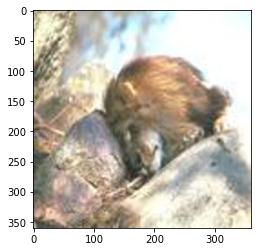

In [16]:
n=50
show_img(output, n)
def PSNR(img_x, img_y):
    loss = np.mean(np.square(img_x-img_y))

    return 20*np.log10(1/np.sqrt(loss))
psnr = PSNR(output[n], y_test[n])

print(psnr)


In [8]:
PSNR_list = []
for i in range(len(x_test)-5):
    mine = PSNR(output[i], y_test[i])
    default = PSNR(x_test[i], y_test[i])
    PSNR_list.append(mine-default)
print(PSNR_list)

[-0.00024315278994890832, -1.4274553659987532e-05, -1.2504187907325104e-08, 2.4846338000372725e-06, 9.351808216706559e-11, -3.1858470350698553e-07, 2.1350897654315304e-06, -2.913098924040014e-05, 2.596465265014558e-10, -0.0002541078869633395, -7.854622907643716e-08, -2.2098447516327724e-09, -1.5107147888215877e-07, -1.315929765155488e-08, -0.013246248924161819, -3.342731957900469e-08, -5.6533988214368947e-05, 5.754043606032155e-06, 2.538520504913322e-10, -5.014540208136964e-05, -0.004892023573617621, -0.0010940912580323925, 4.225465175977661e-06, -8.901249870518768e-08, -3.304249467817044e-05, 1.056749828975967e-05, -0.00010526011223177534, -0.018673111658259245, -1.5967401324701314e-05, -2.0166945049027163e-05, -0.0006926715721284893, -2.531752937073861e-06, 6.583594398534842e-07, -4.1282745545601074e-05, -0.021307006635129966, -2.194342006944794e-05, -0.00013656657462846056, -5.198848896625918e-05, -0.0003439418969861663, 6.004152908190008e-08, -6.625817654537514e-07, -3.176921481440

(22, 360, 360, 3)
